In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df=pd.read_csv('dataset_group.csv')

In [4]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [5]:
df.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [7]:
df["Product"].unique()

array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'beef', 'aluminum foil', 'dinner rolls',
       'shampoo', 'mixes', 'soap', 'laundry detergent', 'ice cream',
       'toilet paper', 'hand soap', 'waffles', 'cheeses', 'milk',
       'dishwashing liquid/detergent', 'individual meals', 'cereals',
       'tortillas', 'spaghetti sauce', 'ketchup', 'sandwich loaves',
       'poultry', 'bagels', 'eggs', 'juice', 'pasta', 'paper towels',
       'coffee/tea', 'fruits', 'sugar'], dtype=object)

In [8]:
len(df["Product"].unique())

37

In [9]:
df.shape

(20641, 3)

In [10]:
# Get the first date
first_date = df['Date'].min()

# Get the last date
last_date = df['Date'].max()

print(f"First Date: {first_date}")
print(f"Last Date: {last_date}")

First Date: 01-01-2018
Last Date: 31-08-2019


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [12]:
df.duplicated().sum()

4730

In [13]:
df.shape

(20641, 3)

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\abdul\AppData\Local\Temp\ipykernel_13184\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [16]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.to_period('Q')
df['day'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

C:\Users\abdul\AppData\Local\Temp\ipykernel_13184\659654482.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = daily_orders.groupby(daily_orders['Date'].dt.to_period('M')).sum().reset_index()


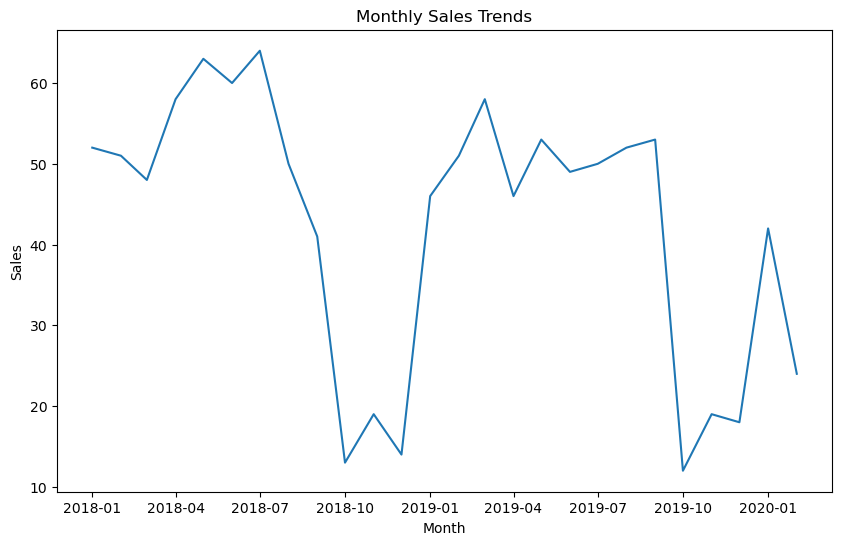

In [17]:

# Define date range (example: up to February 2020)
start_date = pd.Timestamp('2018-01-01')
end_date = pd.Timestamp('2020-02-29')

# Filter data within date range
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Count orders by date
daily_orders = df_filtered.groupby('Date')['Order_id'].nunique().reset_index(name='sales')
# Monthly Trends
monthly_sales = daily_orders.groupby(daily_orders['Date'].dt.to_period('M')).sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Date', y='sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


C:\Users\abdul\AppData\Local\Temp\ipykernel_13184\1187748555.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_sales = daily_orders.groupby(daily_orders['Date'].dt.to_period('Q')).sum().reset_index()


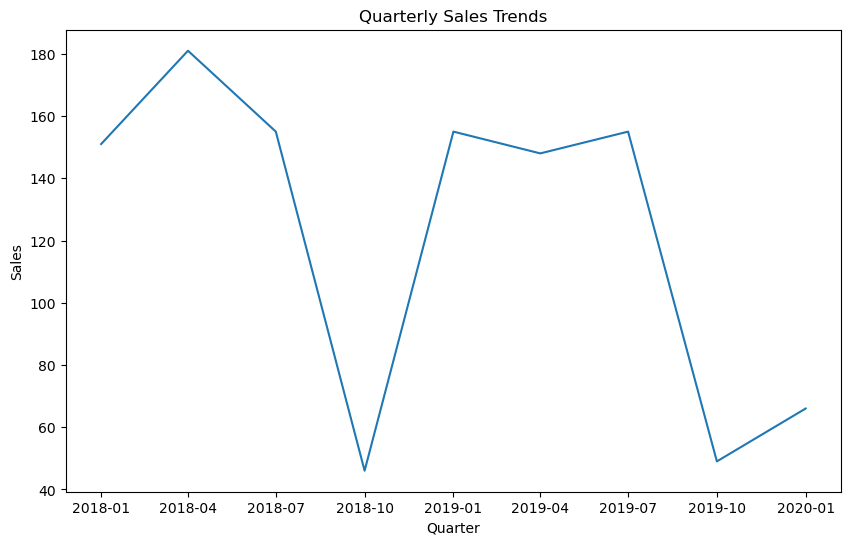

In [18]:
# Quarterly Trends
quarterly_sales = daily_orders.groupby(daily_orders['Date'].dt.to_period('Q')).sum().reset_index()
quarterly_sales['Date'] = quarterly_sales['Date'].dt.to_timestamp()
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_sales, x='Date', y='sales')
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_13184\3340582194.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sales = daily_orders.groupby(daily_orders['Date'].dt.year).sum().reset_index()


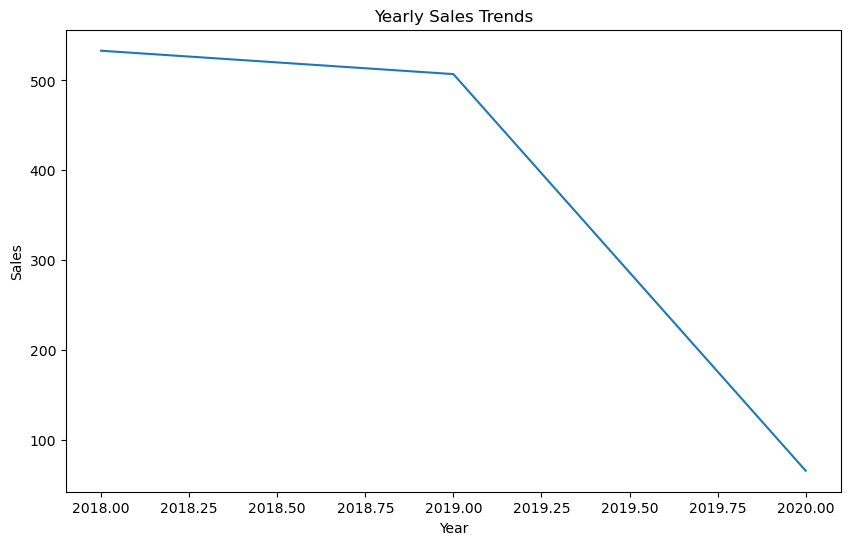

In [19]:
# Yearly Trends
yearly_sales = daily_orders.groupby(daily_orders['Date'].dt.year).sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Date', y='sales')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


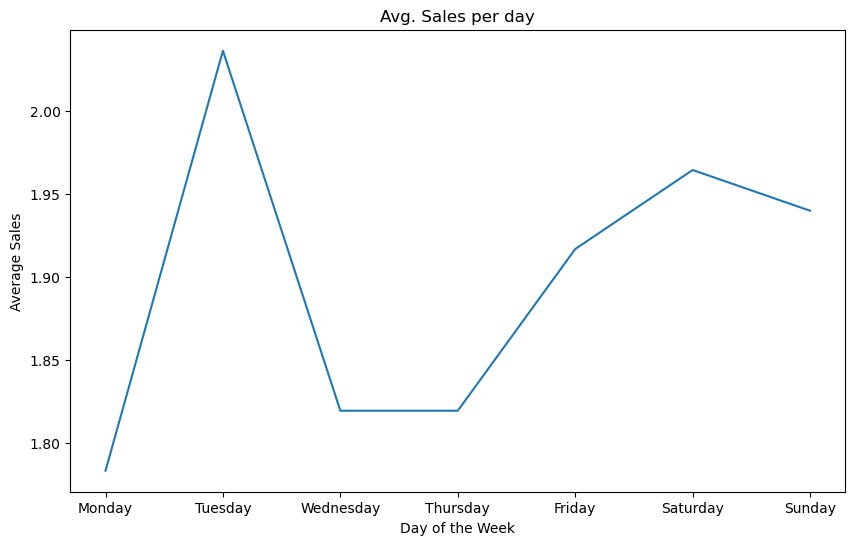

In [20]:
# Daily Trends
daily_orders['day'] = daily_orders['Date'].dt.dayofweek
daily_sales = daily_orders.groupby('day')['sales'].mean().reset_index()  # Using mean to smooth out the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales, x='day', y='sales')
plt.title('Avg. Sales per day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

Text(0.5, 1.0, 'Top 10 Products by Count')

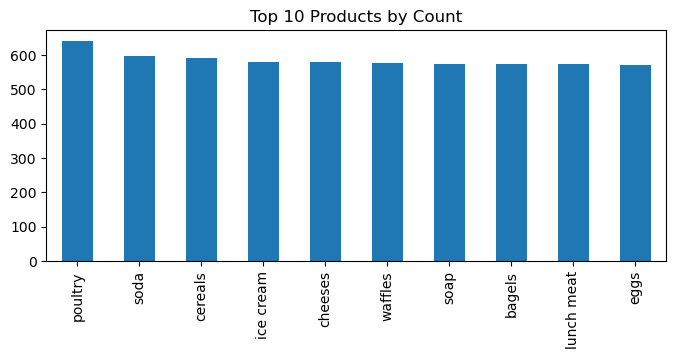

In [21]:
df['Product'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(8,3));
plt.title('Top 10 Products by Count')

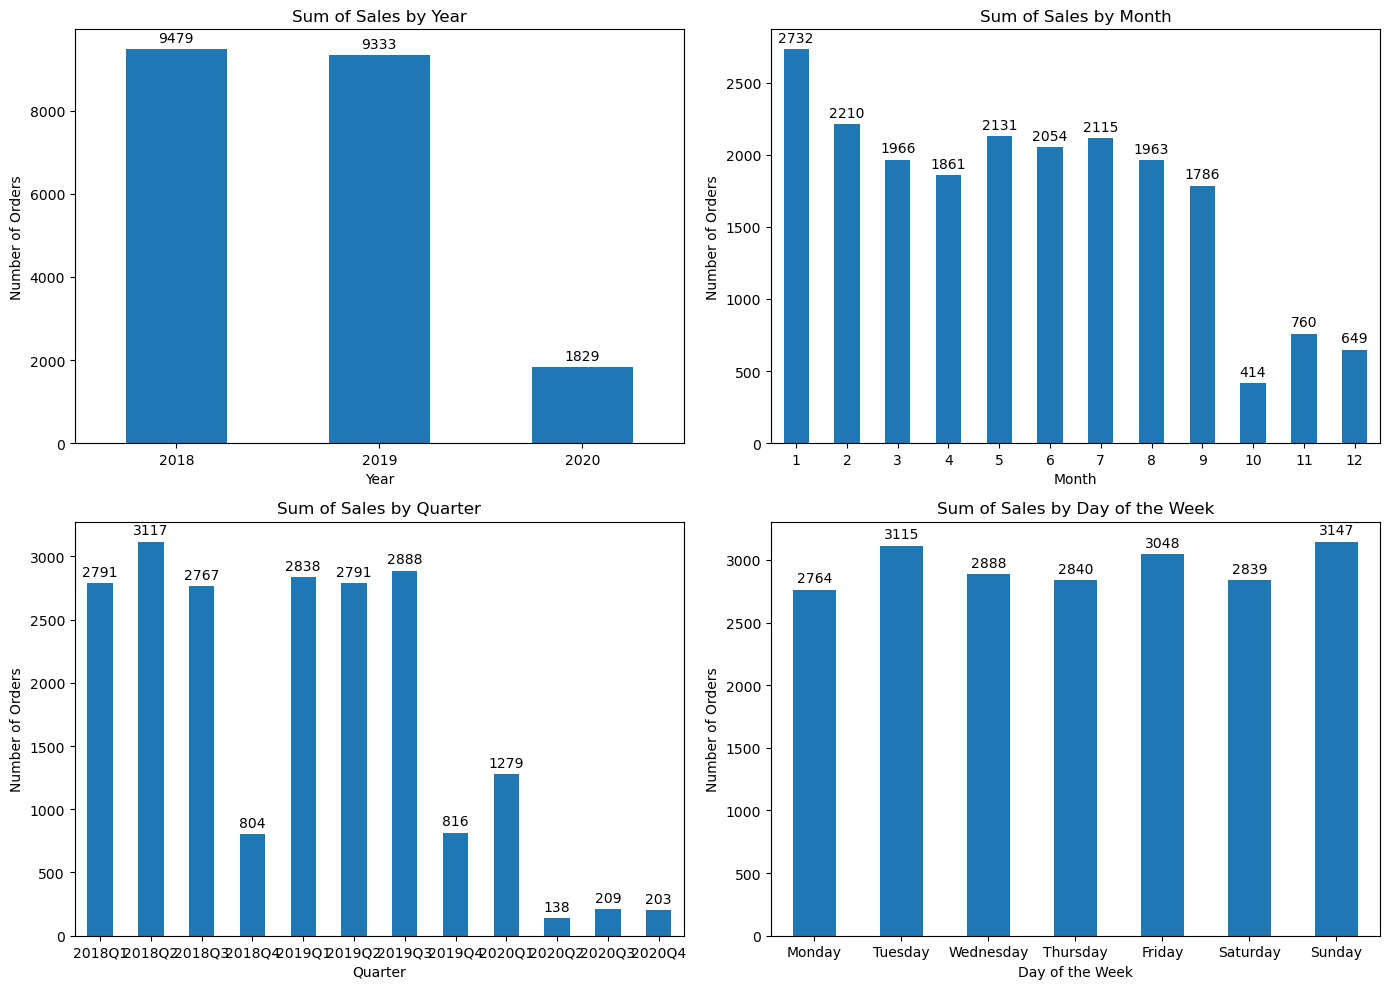

In [22]:

# Example: Sum of sales by year
sales_by_year = df.groupby('year').size()

# Example: Sum of sales by month
sales_by_month = df.groupby('month').size()

# Example: Sum of sales by quarter
sales_by_quarter = df.groupby('quarter').size()

# Example: Sum of sales by day of the week
sales_by_day = df.groupby('day').size()

# Plotting
plt.figure(figsize=(14, 10))

# Plot for sales by year
plt.subplot(2, 2, 1)
bars = sales_by_year.plot(kind='bar', rot=0)
plt.title('Sum of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

# Plot for sales by month
plt.subplot(2, 2, 2)
bars = sales_by_month.plot(kind='bar', rot=0)
plt.title('Sum of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

# Plot for sales by quarter
plt.subplot(2, 2, 3)
bars = sales_by_quarter.plot(kind='bar', rot=0)
plt.title('Sum of Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

# Plot for sales by day of the week
plt.subplot(2, 2, 4)
bars = sales_by_day.plot(kind='bar', rot=0)
plt.title('Sum of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


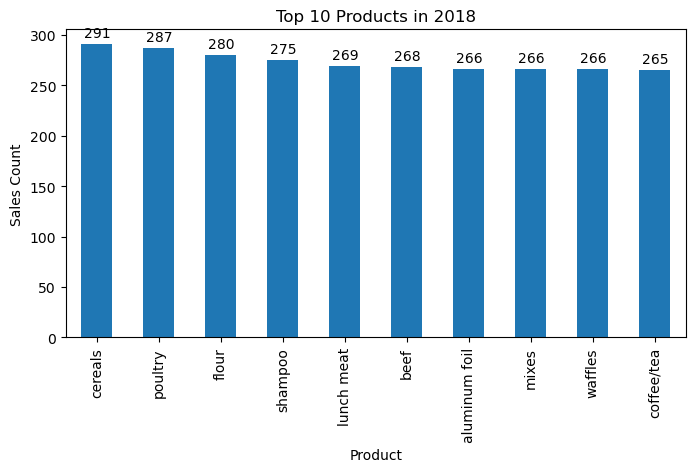

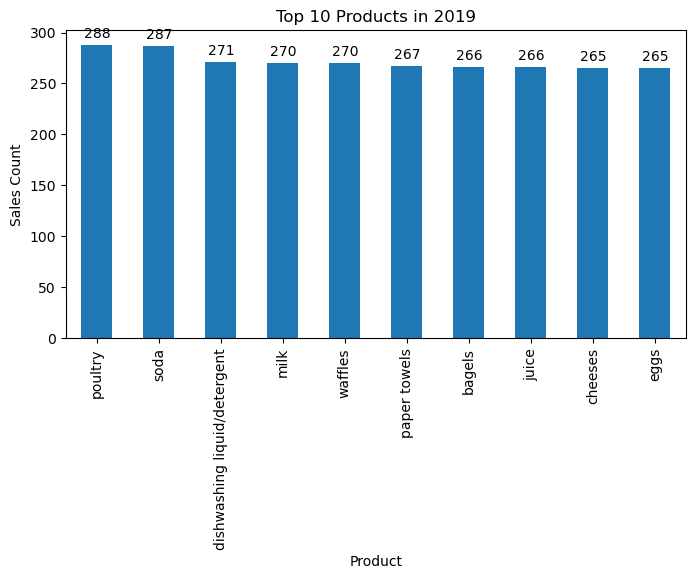

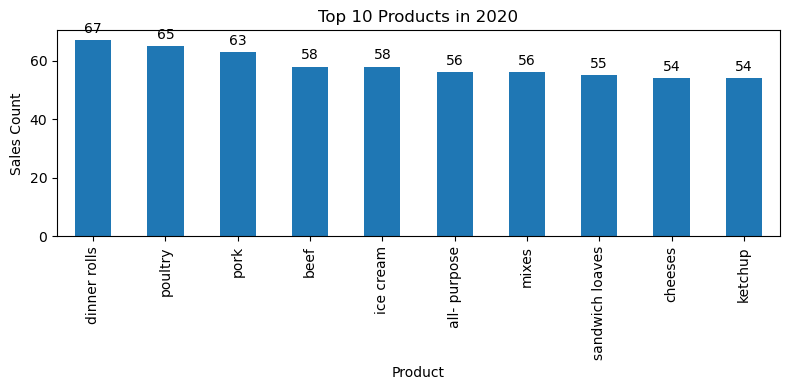

In [23]:

product_sales = df.groupby(['Product', 'year']).size().reset_index(name='Count')

# Create a pivot table to reshape data for easier analysis
sales_pivot = product_sales.pivot(index='Product', columns='year', values='Count').fillna(0)

# Get top 10 products by sales count for each year
top_products_by_year = {}
for year in sales_pivot.columns:
    top_products_by_year[year] = sales_pivot[year].nlargest(10)

# Plotting each year separately
for year, data in top_products_by_year.items():
    plt.figure(figsize=(8, 4))
    bars = data.plot(kind='bar', stacked=True)
    plt.title(f'Top 10 Products in {year}')
    plt.xlabel('Product')
    plt.ylabel('Sales Count')
    
    # Annotate each bar with its value
    for bar in bars.patches:
        plt.annotate(format(bar.get_height(), '.0f'), 
                     (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

In [24]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [25]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [26]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket=basket.applymap(encode_zero_one)

In [27]:
itemsets = apriori(basket, min_support = 0.05, use_colnames = True, low_memory=True)
itemsets 

C:\Users\abdul\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
8449,0.051800,"(ice cream, spaghetti sauce, dinner rolls, pou..."
8450,0.051800,"(juice, spaghetti sauce, dinner rolls, poultry)"
8451,0.053556,"(spaghetti sauce, dinner rolls, poultry, laund..."
8452,0.050044,"(dishwashing liquid/detergent, mixes, poultry,..."


In [28]:
top_10 = itemsets.nlargest(10, 'support')

top_10

,support,itemsets
25,0.421422,(poultry)
14,0.398595,(ice cream)
5,0.395961,(cereals)
19,0.395083,(lunch meat)
35,0.394205,(waffles)
6,0.390694,(cheeses)
30,0.390694,(soda)
10,0.389816,(eggs)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


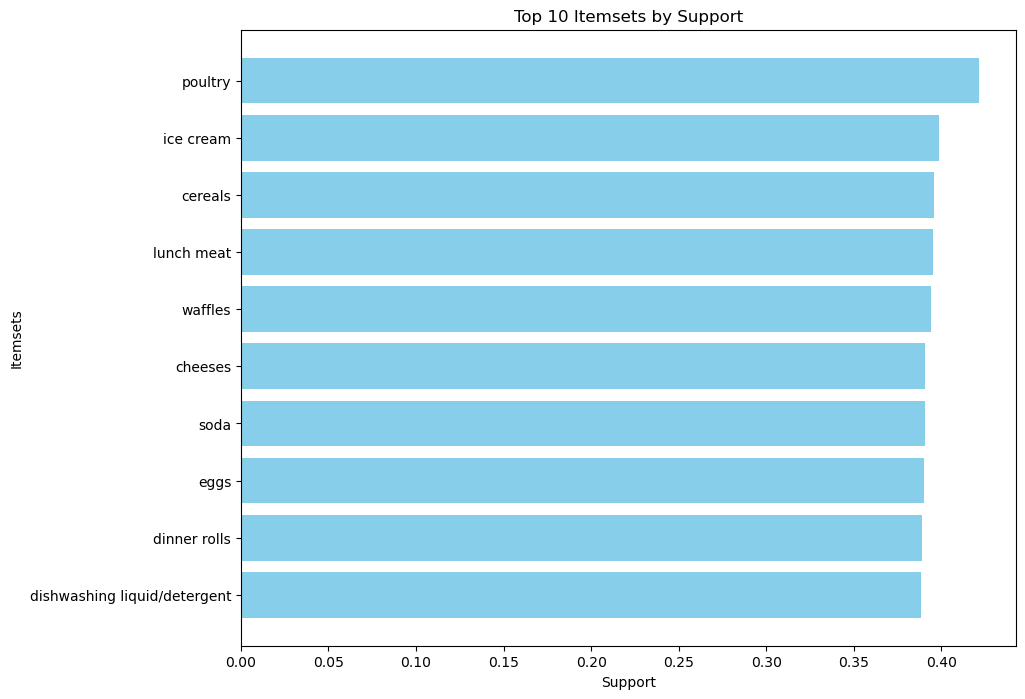

In [29]:
top_10['itemsets'] = top_10['itemsets'].apply(lambda x: ', '.join(x))
plt.figure(figsize=(10, 8))
plt.barh(top_10['itemsets'], top_10['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Itemsets by Support')
plt.gca().invert_yaxis()  # To display the highest support at the top
plt.show()
